In [1]:
# getting the dataset from the Apis
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2022-10-09 05:17:46--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2022-10-09 05:17:46 (82.6 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-10-09 05:17:46--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[=========

In [2]:
# unzip .gz data files
!gunzip '/content/t10k-images-idx3-ubyte.gz'
!gunzip '/content/t10k-labels-idx1-ubyte.gz'
!gunzip '/content/train-images-idx3-ubyte.gz'
!gunzip '/content/train-labels-idx1-ubyte.gz'

In [3]:
# installing library for loading the data
%pip install python-mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the images and labels in arrays by creating the MNIST object
mndata = MNIST('/content/')
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [6]:
# converting the train_images and test_images of type list into numpy ndarray

train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
# checking the shape of testing and training arrays

print(f"Shape of Training Images N-D Array: {train_images.shape}")
print(f"Shape of Testing Images N-D Array: {test_images.shape}")
print(f"Shape of Training Labels N-D Array: {train_labels.shape}")
print(f"Shape of Testing Labels N-D Array: {test_labels.shape}")

Shape of Training Images N-D Array: (60000, 784)
Shape of Testing Images N-D Array: (10000, 784)
Shape of Training Labels N-D Array: (60000,)
Shape of Testing Labels N-D Array: (10000,)


## **Converting nd-arrays to Dataframes**

because dataframes are easy to handle.

In [8]:
dataset = pd.DataFrame(train_images)
dataset['label'] = train_labels
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [9]:
test_dataset = pd.DataFrame(test_images)
test_dataset['label'] = test_labels
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [10]:
# appending the test dataset in train dataset
dataset.append(test_dataset)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [11]:
# finding distinct classes in the train dataset
distinct_classes = list(dataset['label'].unique())
distinct_classes

[5, 0, 4, 1, 9, 2, 3, 6, 7, 8]

In [12]:
# function to return two images having the same label
def return_images(dataset, value):
  return list(dataset.query("label == {}".format(value))[:2].index)

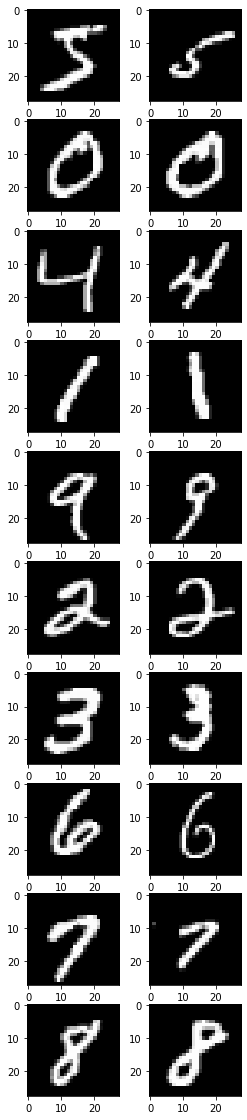

In [13]:
# visualize 2 images of each class
plt.figure(figsize=(4, 20))

j = 0
for i in range(len(distinct_classes)):
  image_indexes = return_images(dataset, distinct_classes[i])
  for index in image_indexes:
    plt.subplot(10, 2, j+1)
    point = np.array(dataset.iloc[[index]].loc[:, dataset.columns != 'label'])
    pixels = point.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    j+=1

plt.show()

# **OvR - One vs Rest**

It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

In [14]:
# splitting the label from the dataset
X = dataset.drop(columns=['label'], axis=1)
Y = dataset['label']

In [16]:
# splitting the dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
ovr_model = LogisticRegression(multi_class='ovr')
ovr_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [19]:
def classwise_accuracy(model):
  predicted_label = model.predict(x_test)
  a = pd.crosstab(y_test, predicted_label)
  print(a)
  print()
  print(a.max(axis=1)/a.sum(axis=1))

**pd.crosstab**: It compute a simple cross tabulation of two (or more) factors. By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [20]:
classwise_accuracy(ovr_model)

col_0     0     1     2     3     4    5     6     7     8     9
label                                                           
0      1174     0     1     2     2    7     9     1     9     0
1         1  1351     4     4     1    2     1     2    12     1
2         8    12  1038    19    10    6    18    13    39     3
3         6     5    31  1070     0   33     3    10    41     9
4         0     5     6     1  1067    6    14     4    13    37
5        17     2     8    40    17  895    18     5    54    19
6        11     3     7     2     9   16  1131     1    10     0
7         1     3    12     6    10    1     0  1135     9    51
8        10    28    15    24     8   41     5     2  1039    19
9         5     3     6    17    35    6     0    33    14  1086

label
0    0.974274
1    0.979695
2    0.890223
3    0.885762
4    0.925412
5    0.832558
6    0.950420
7    0.924267
8    0.872376
9    0.901245
dtype: float64


# **OvO - One vs One**

One-vs-one splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class.

In [21]:
ovo_model = OneVsOneClassifier(LogisticRegression())
ovo_model.fit(x_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression())

In [22]:
classwise_accuracy(ovo_model)

col_0     0     1     2     3     4    5     6     7     8     9
label                                                           
0      1166     0     7     1     1   14    10     1     4     1
1         0  1348     9     3     1    2     0     2    13     1
2         8     2  1066    23    10    3    10    16    27     1
3         4     8    21  1080     0   49     1    10    26     9
4         1     3    16     2  1073    2     9     8     2    37
5         9     2    17    33     9  954    13     3    26     9
6         4     2    11     1    10   19  1135     2     6     0
7         1     2     9     7     9    0     2  1150     7    41
8         6    16    29    22     1   55     3     2  1038    19
9         5     4     6     7    31    5     0    41     8  1098

label
0    0.967635
1    0.977520
2    0.914237
3    0.894040
4    0.930616
5    0.887442
6    0.953782
7    0.936482
8    0.871537
9    0.911203
dtype: float64
